In [41]:
import pandas as pd
df = pd.read_csv('/content/fake_news_processed.csv')

In [42]:
df.head()

,text,label,processed_text
0,no comment is expected from barack obama membe...,1,no comment is expected from barack obama membe...
1,did they post their votes for hillary already,1,did they post their vote for hillary already
2,now most of the demonstrators gathered last n...,1,now most of the demonstrator gathered last nig...
3,a dozen politically active pastors came here f...,0,a dozen politically active pastor came here fo...
4,the rs28 sarmat missile dubbed satan 2 will re...,1,the rs28 sarmat missile dubbed satan 2 will re...


In [43]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [44]:
df['text'] = df['text'].astype(str)

In [45]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])
vocab_size = len(tokenizer.word_index)

In [46]:
vocab_size = min(10000, len(tokenizer.word_index) + 1)

In [47]:
sequences = tokenizer.texts_to_sequences(df['text'])
sequence_lengths = [len(seq) for seq in sequences]

In [48]:
max_length = max(sequence_lengths)

In [49]:
padded_text = pad_sequences(sequences,maxlen = 200, padding='post', truncating='post')

print(padded_text.shape)

(62718, 200)


In [50]:
from sklearn.model_selection import train_test_split


# Replace `labels` with your actual labels for the dataset
labels = df['label'].values  # Use the actual column for labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(padded_text, labels, test_size=0.2, random_state=42)


In [51]:
print('the shape of X_train:',X_train.shape)
print('the shape of y_train:',y_train.shape)


the shape of X_train: (50174, 200)
the shape of y_train: (50174,)


In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=100))
model.add(Bidirectional(LSTM(64, return_sequences=True)))  # Bidirectional LSTM layer
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Bidirectional(LSTM(32)))  # Another Bidirectional LSTM layer
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification


# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])



In [57]:
# Step 7: Training the Model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=2)


Epoch 1/5
784/784 - 418s - loss: 0.2055 - accuracy: 0.9150 - val_loss: 0.1118 - val_accuracy: 0.9593 - 418s/epoch - 533ms/step
Epoch 2/5
784/784 - 411s - loss: 0.0958 - accuracy: 0.9657 - val_loss: 0.1645 - val_accuracy: 0.9255 - 411s/epoch - 524ms/step
Epoch 3/5
784/784 - 418s - loss: 0.1686 - accuracy: 0.9349 - val_loss: 0.1182 - val_accuracy: 0.9605 - 418s/epoch - 533ms/step
Epoch 4/5
784/784 - 410s - loss: 0.0608 - accuracy: 0.9800 - val_loss: 0.1023 - val_accuracy: 0.9655 - 410s/epoch - 523ms/step
Epoch 5/5
784/784 - 409s - loss: 0.0382 - accuracy: 0.9882 - val_loss: 0.1171 - val_accuracy: 0.9637 - 409s/epoch - 522ms/step


In [59]:
# Step 8: Evaluating the Model
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)


392/392 [==============================] - 26s 67ms/step
Accuracy: 0.9637276785714286


In [60]:
#classification score
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6922
           1       0.95      0.97      0.96      5622

    accuracy                           0.96     12544
   macro avg       0.96      0.96      0.96     12544
weighted avg       0.96      0.96      0.96     12544



<Axes: >

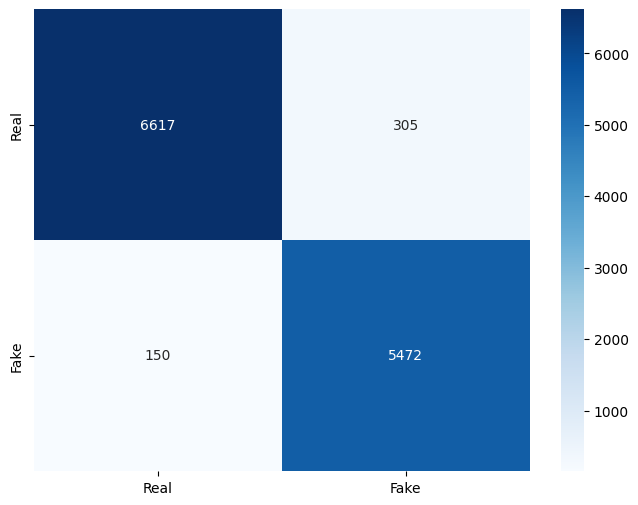

In [63]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])

In [64]:
# Save the model if needed
model.save('fake_news_classifier_bidir_lstm.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
